In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

# PART 2 - DATA PREPERATION

In [2]:
## READ IN DATASET TO PANDAS DATAFRAME

column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type"
)
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [3]:
## CHECK SHAPE OF DATA

soil.shape

(581012, 55)

In [4]:
## ALL IMPORTED DATATYPES ARE NUMERICAL. THEREFORE NO WHITESPACES/BROKEN STRINGS.

print (soil.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [5]:
## CHECK IF THERE ARE ANY MISSING VALUES

print ('MISSING VALUES : ' + str(soil.isnull().values.any()))

MISSING VALUES : False


In [6]:
## CONVERT WILDERNESS TYPE, SOIL TYPE AND COVER TYPE TO CATEGORICAL DATA

for pos in range(10,55):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')

soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null category
Wilderness_Area_02                    581012 non-null category
Wilderness_Area_03                    581012 non-null category
Wilderness_Area_04                    581012 non-null category
Soil_Type_01                         

# PART 2 - DATA EXPLORATION 

### A - EXPLORE EACH COLUMN

#### USING APPROPRIATE DESCRIPTIVE STATISTICS

In [7]:
soil.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


#### PLOT EACH COLUMN IN INDIVIDUAL GRAPHS

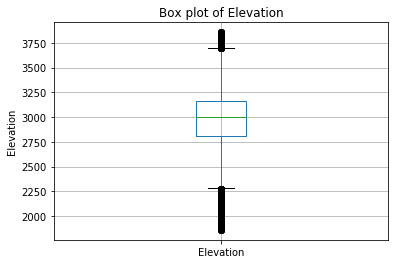

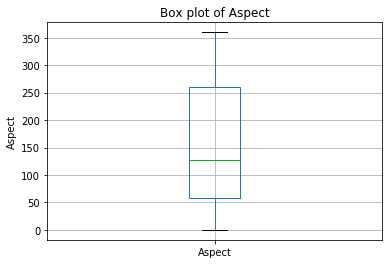

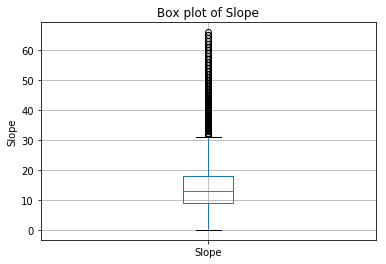

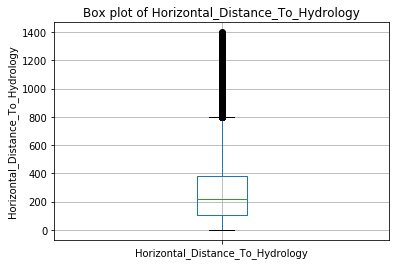

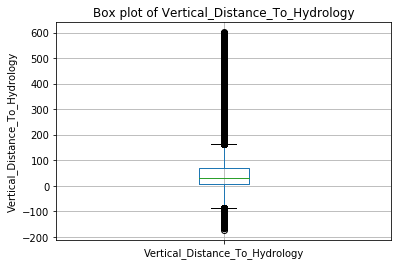

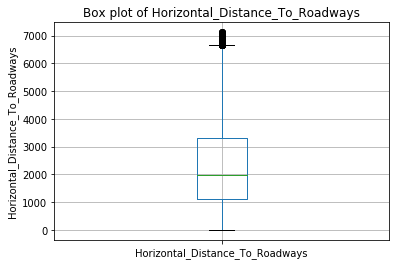

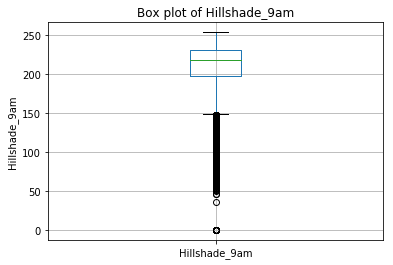

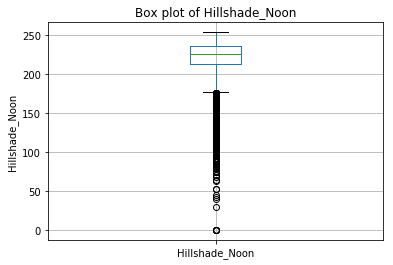

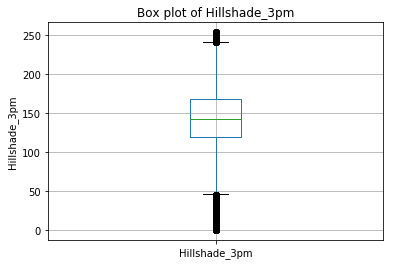

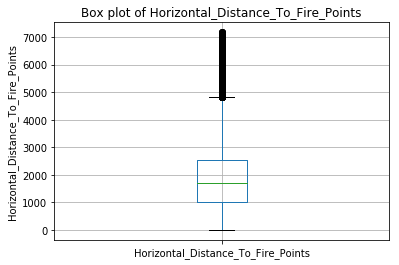

In [8]:
## BOXPLOT FOR NUMERICAL DATA EXPLORATION

for col in soil.columns:

    if (soil[col].dtype.name == 'int64'):
        title = 'Box plot of '+ col
        plt.figure(col)
        soil.boxplot(column=col)
        plt.title(title)
        plt.ylabel(col)       

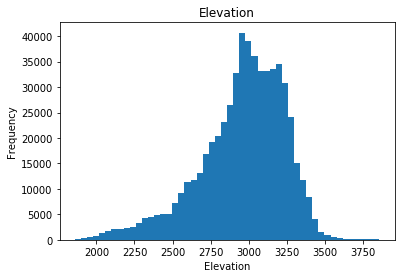

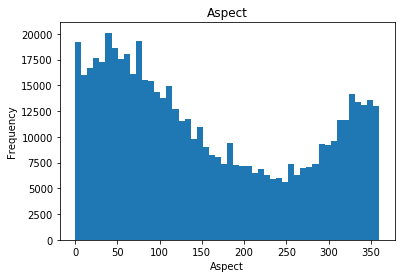

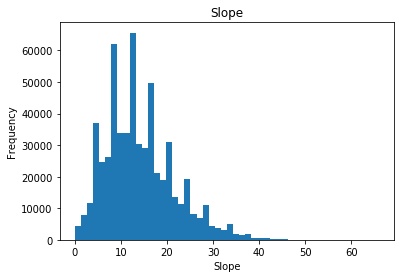

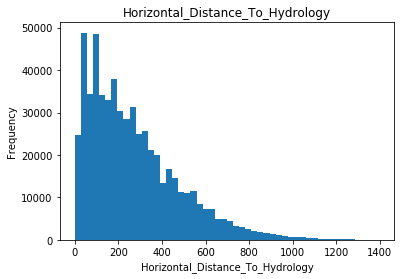

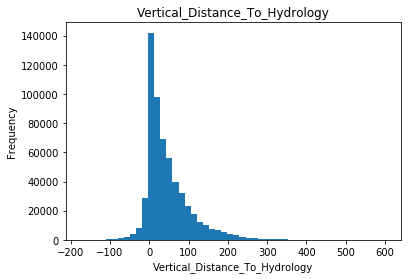

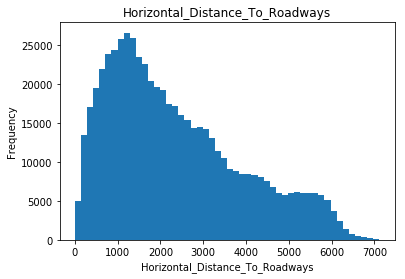

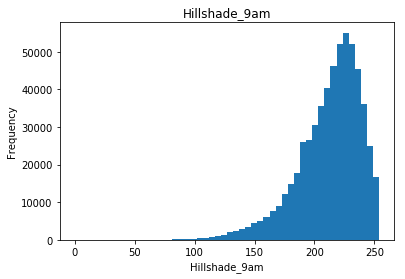

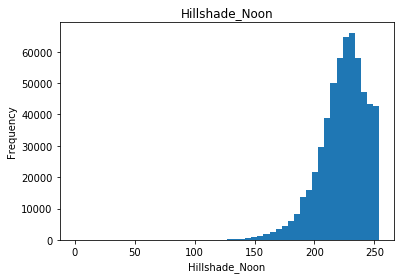

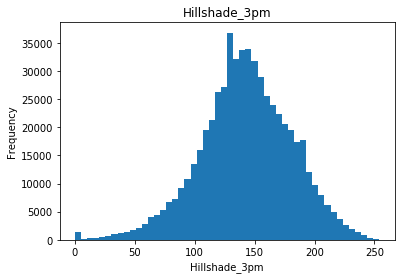

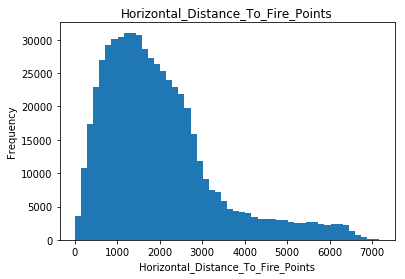

In [9]:
## HISTOGRAMS FOR NUMERICAL DATA EXPLORATION

for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        soil[col].plot(kind='hist', bins=50)
        plt.title(col)
        plt.xlabel(col)
        axes = plt.gca()
        plt.show()

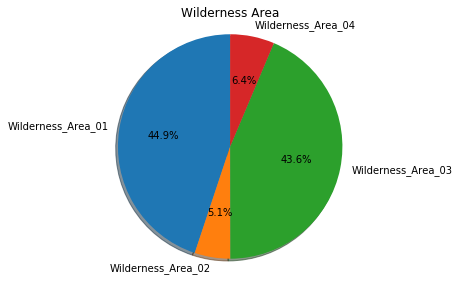

In [10]:
# TEMPORARILY CONVERT WILDERNESS AREA TO NUMERIC TO CREATE PIE CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

for pos in range(10,14):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(soil_copy.columns[pos])
    values.append(soil_copy[soil_copy.columns[pos]].sum())
    
plt.pie(values, autopct='%1.1f%%',shadow=True, labels=columns, startangle=90)
plt.axis('equal')
plt.title('Wilderness Area')
plt.tight_layout()
plt.show()

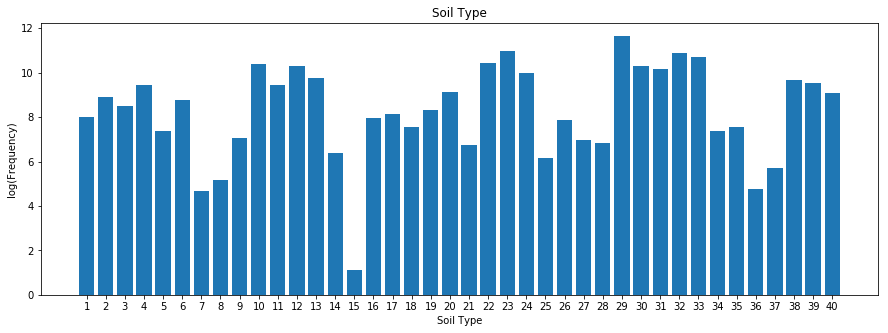

In [11]:
# TEMPORARILY CONVERT SOIL TYPE TO NUMERIC TO CREATE BAR CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

i = 1 

for pos in range(14,54):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(i)
    values.append(np.log(soil_copy[soil_copy.columns[pos]].sum()))
    i+=1
    
plt.bar(columns, values)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("Soil Type")
plt.xlabel('Soil Type')
plt.ylabel('log(Frequency)')
plt.xticks(columns)
plt.show()

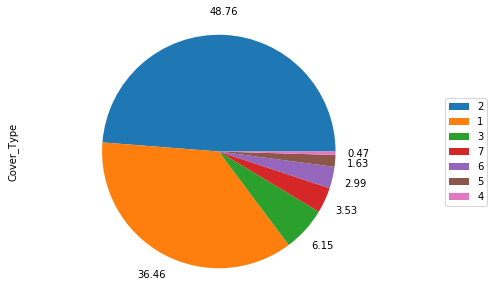

In [12]:
# PIE CHART OF COVER TYPE

soil['Cover_Type'].value_counts().plot(kind='pie',labels=None, autopct='%.2f', pctdistance=1.2)
plt.legend(labels = soil['Cover_Type'].value_counts().index, loc="right", bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

### A - EXPLORE PAIRS OF ATTRIBUTES

Text(0.5,1,'Elevation vs Slope')

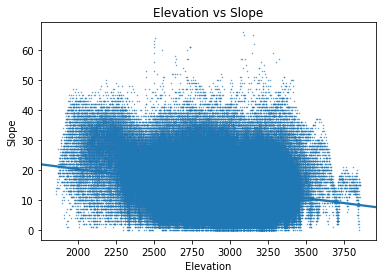

In [13]:
# Regression plot of Elevation vs Slope
sns.regplot(x="Elevation", y="Slope", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Elevation vs Slope')

Text(0.5,1,'Cover Type vs Elevation')

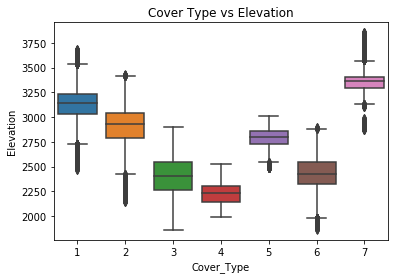

In [14]:
# Cover Type vs Elevation
sns.boxplot(x=soil["Cover_Type"], y=soil["Elevation"]).set_title('Cover Type vs Elevation')

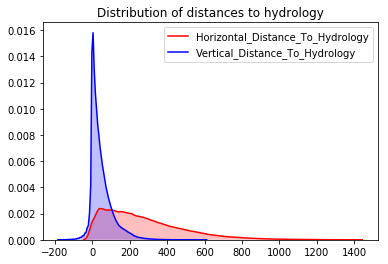

In [15]:
# Distribution of distances to hydrology

p1=sns.kdeplot(soil['Horizontal_Distance_To_Hydrology'], shade=True, color="r").set_title('Distribution of distances to hydrology')
p1=sns.kdeplot(soil['Vertical_Distance_To_Hydrology'], shade=True, color="b")

Text(0.5,1,'Aspect Ratio vs Hillshade Index at noon')

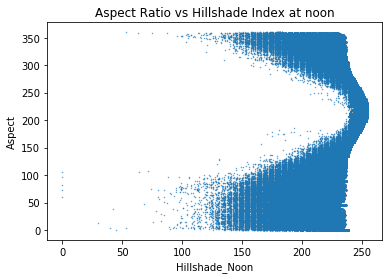

In [16]:
# Aspect Ratio vs Hillshade Index at noon

sns.regplot(x="Hillshade_Noon", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at noon')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

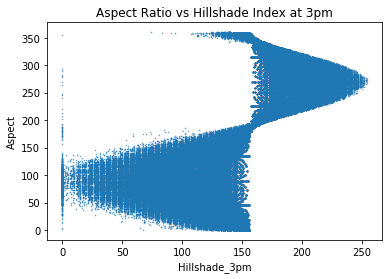

In [ ]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Hillshade_3pm", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at 3pm')

In [ ]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Slope", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Aspect Ratio vs Hillshade Index at 3pm')